In [1]:
import matplotlib.pyplot as plt
import numpy as np

twopi = 2*np.pi

In [2]:
def std_map(itr, ic, K=0.5):
    '''Iterations, initial conditions and K'''
    state = np.empty(shape=(itr+1, 2), dtype=ic.dtype)
    state[0][0], state[0][1] = ic[0], ic[1] # Initial conditions of (p,x)
    for i in range(itr):
        p = state[i][0] + K * np.sin(state[i][1])
        x = state[i][1] + p
        state[i+1] = np.asarray([twopi*(p/twopi - np.floor(p/twopi)), twopi*(x/twopi - np.floor(x/twopi))])
        # Only consider (p,x) in [0,twopi]*[0,twopi]

    return state

In [12]:
ic = np.asarray([.5, .3])
traj = std_map(2**10, ic, 0.7))

SyntaxError: invalid syntax (<ipython-input-12-fa875a973766>, line 2)

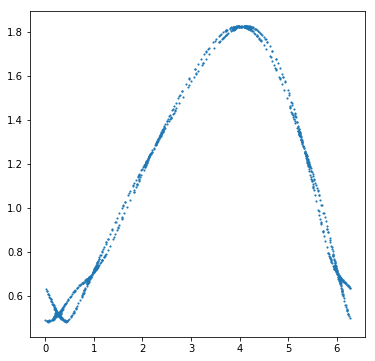

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(traj[:, 1], traj[:, 0], marker='.', s=5, linestyle='None')
fig.savefig('stdmap1.png', format='png')

In [6]:
import matplotlib.pyplot as plt
import numpy as np

twopi = 2*np.pi

In [7]:
def std_map_multi(iterations, initial_condition, K=.3):
    history = np.zeros(
            tuple([iterations+1]+list(initial_condition.shape)),
            # Question 1 list tuple???
            dtype = initial_condition.dtype)
    history[0, :] = initial_condition
    for i in range(1, iterations+1):
        history[i, 1] = np.mod(history[i-1, 1] + K*np.sin(history[i-1, 0]), twopi)
        history[i, 0] = np.mod(history[i-1, 0] + history[i, 1], twopi)
    return history

In [8]:
states = std_map_multi(200, 2*np.pi*np.random.random((2,32)), K= 0.7)

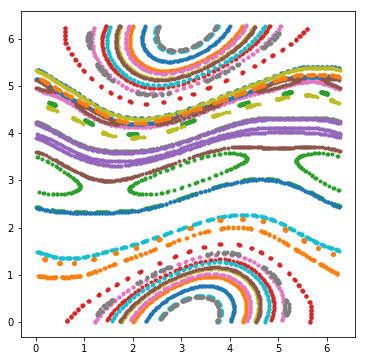

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(states[:, 0], states[:, 1], marker = '.', linestyle='None')
fig.savefig('stdmap2.png', format = 'png')

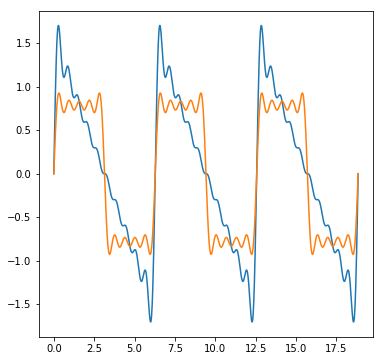

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 6*np.pi, 1000)
sbase = [np.sin(n*x) for n in range (1, 11)]
cbase = [np.cos(n*x) for n in range (1, 11)]
f1 = sum(sbase[n-1]/n for n in range (1, 11))
f2 = sum(sbase[n-1]/n for n in range(1, 11, 2))

'''
f1 and f2 are partial sums of Fourier series. 
S = trivial_term+\sum^10 1/n*(2*pi*n*x/omega), 
where omega=2*pi, n is in {1,2,...,10} or {1,3,...,9}, 1/n is Fourier coefficient.
Periodicities are 2*pi.
'''

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, f1) # Blue wave
ax.plot(x, f2) # Orange wave
fig.savefig('fourier.png', format='png')